# Модели классификации

# Задание для выполнения 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [7]:
y.shape, X.shape

((768,), (768, 8))

In [8]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [14]:
logistic.fit(X, y)
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252349e-01  3.35999221e-02 -1.40873552e-02 -1.27045106e-03
 -1.24032587e-03  7.72022510e-02  1.41904203e+00  1.00352895e-02]


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234897262528
Glucose 0.03359992207277382
BloodPressure -0.014087355227627954
SkinThickness -0.001270451059916912
Insulin -0.0012403258730109355
BMI 0.07720225102970299
DiabetesPedigreeFunction 1.4190420266665211
Age 0.010035289489313905


In [17]:
print("Intercept: \n", logistic.intercept_)
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]


Intercept: 
 [-7.70292047]
1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [18]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

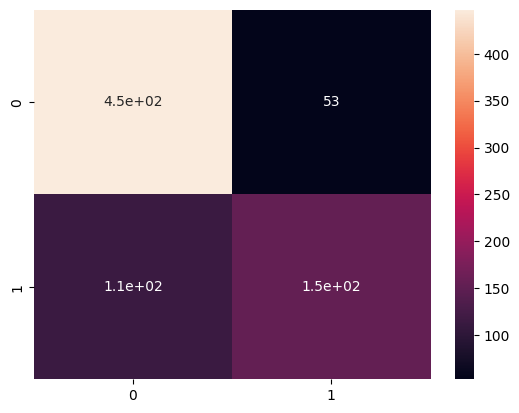

In [19]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [20]:
logistic.score(X, y)

0.7825520833333334

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [26]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

polynomial.score(poly, y)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7265625

# Задачи для самостоятельного выполнения 

### 1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [33]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)

print("Coefficients: \n", logistic.coef_)
print("Coefficients: \n", logistic.intercept_)
print("Coefficients: \n", logistic.classes_)

Coefficients: 
 [[ 1.17252349e-01  3.35999221e-02 -1.40873552e-02 -1.27045106e-03
  -1.24032587e-03  7.72022510e-02  1.41904203e+00  1.00352895e-02]]
Coefficients: 
 [-7.70292047]
Coefficients: 
 [0 1]


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2 - 3 Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


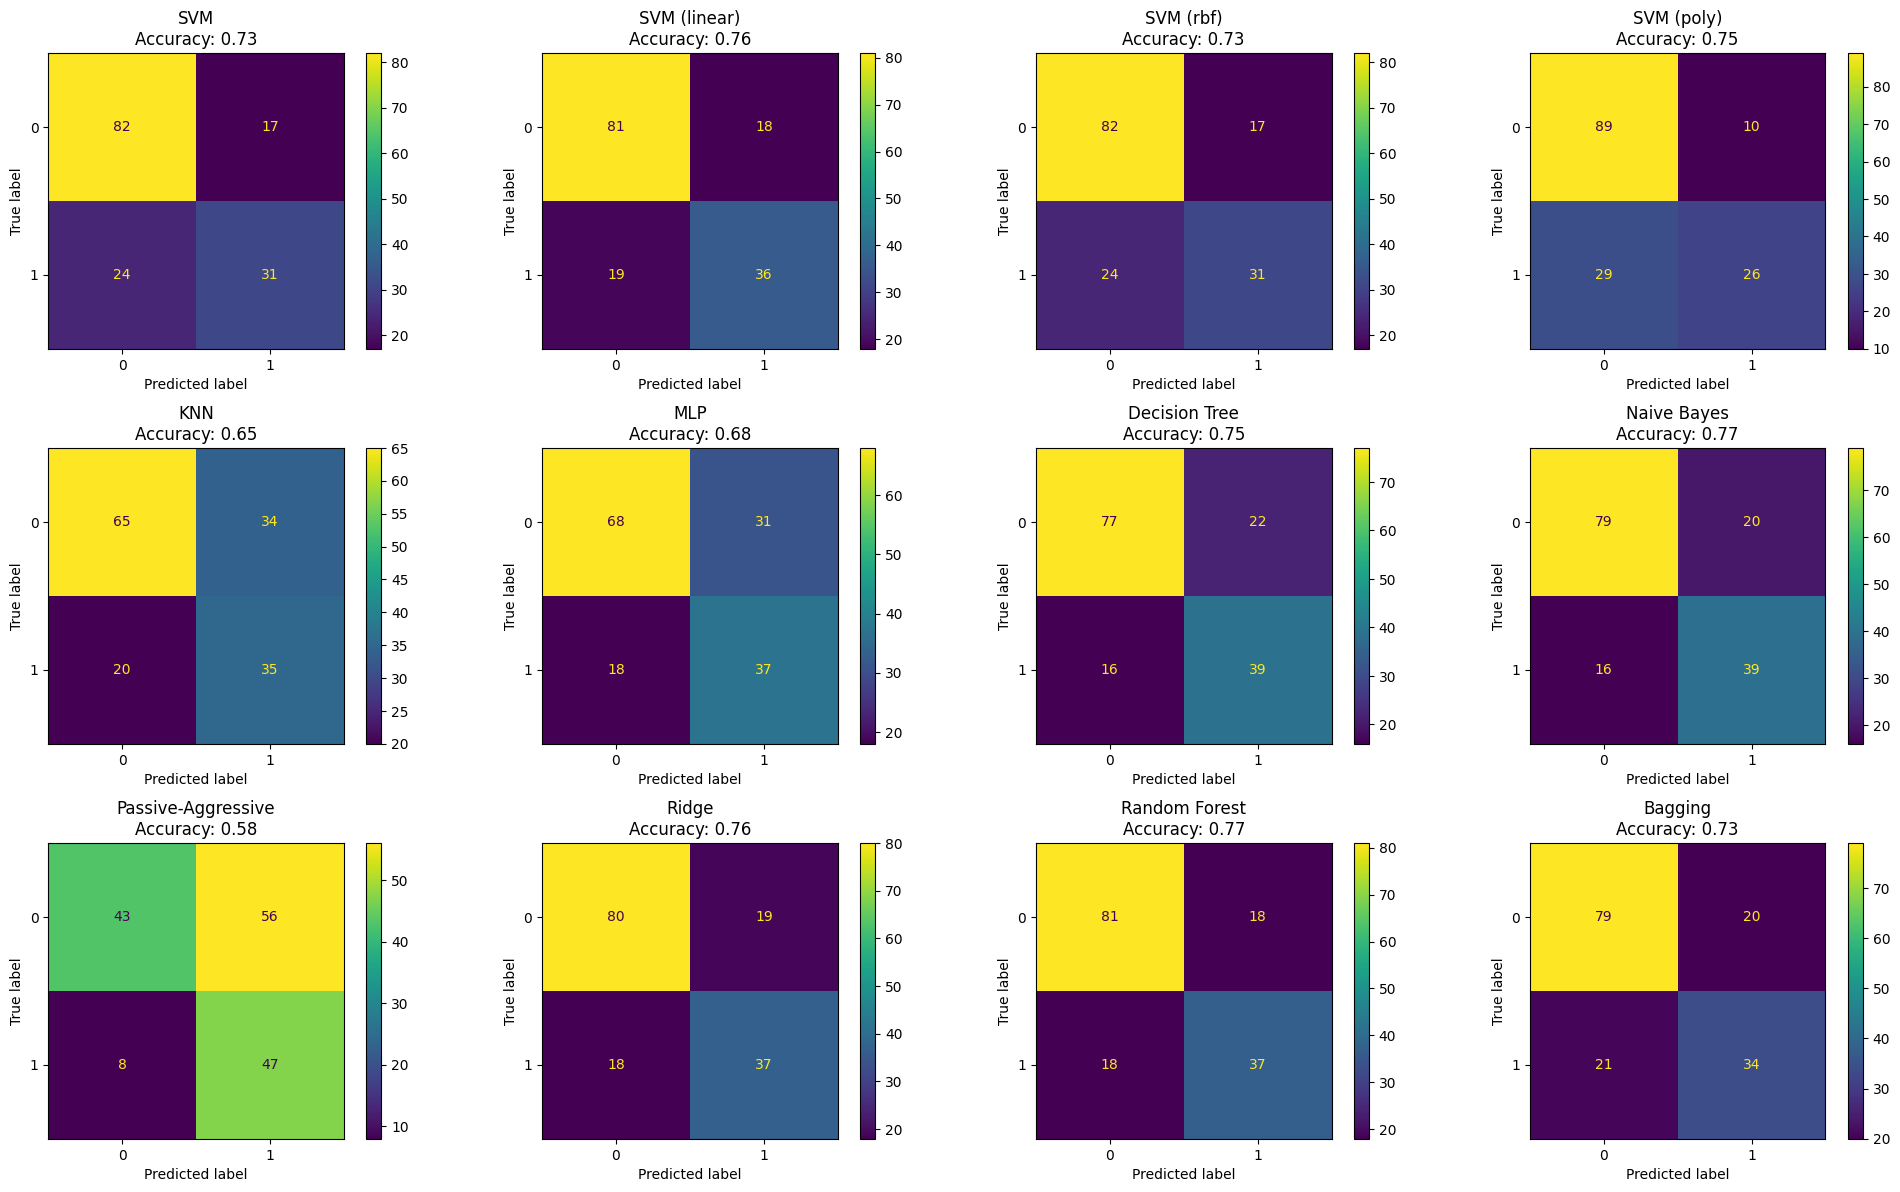

                 Model  Accuracy
0                  SVM  0.733766
1         SVM (linear)  0.759740
2            SVM (rbf)  0.733766
3           SVM (poly)  0.746753
4                  KNN  0.649351
5                  MLP  0.681818
6        Decision Tree  0.753247
7          Naive Bayes  0.766234
8   Passive-Aggressive  0.584416
9                Ridge  0.759740
10       Random Forest  0.766234
11             Bagging  0.733766


In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

def fit_all_classifiers(X_train, y_train, X_test, y_test):
    model_arr = [
        make_pipeline(StandardScaler(), SVC()), # Метод опореных векторов без ядра 
        make_pipeline(StandardScaler(), SVC(kernel='linear')), # Метод опореных векторов с линейным ядром
        make_pipeline(StandardScaler(), SVC(kernel='rbf')), # Метод опореных векторов с гауссовым ядром
        make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3)), # Метод опореных векторов с полиномиальным ядром
        KNeighborsClassifier(n_neighbors=3), # Метод ближайших соседей
        MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), # Многослойный перцептрон
        DecisionTreeClassifier(max_depth=10, random_state=42), # Дерево решений
        GaussianNB(), # Наивный байесовский классификатор
        PassiveAggressiveClassifier(random_state=42), # Пассивно-агрессивный классификатор
        RidgeClassifier(), # Гребневый классификатор
        RandomForestClassifier(n_estimators=100, random_state=0), # Случайный лес
        BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0) # Беггинг
    ]

    model_names = [
        "SVM","SVM (linear)", "SVM (rbf)", "SVM (poly)",
        "KNN", "MLP", "Decision Tree",
        "Naive Bayes", "Passive-Aggressive", "Ridge", 
        "Random Forest", "Bagging"
    ]

    metrics = []

    fig, axs = plt.subplots(3, 4, figsize=(20, 12))
    axs = axs.flatten()

    for i, (model, name) in enumerate(zip(model_arr, model_names)):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        ConfusionMatrixDisplay(cm).plot(ax=axs[i])
        axs[i].set_title(f"{name}\nAccuracy: {acc:.2f}")
        
        metrics.append({"Model": name, "Accuracy": acc})

    for j in range(len(model_arr), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)

fit_all_classifiers(X_train, y_train, X_test, y_test)

### 4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


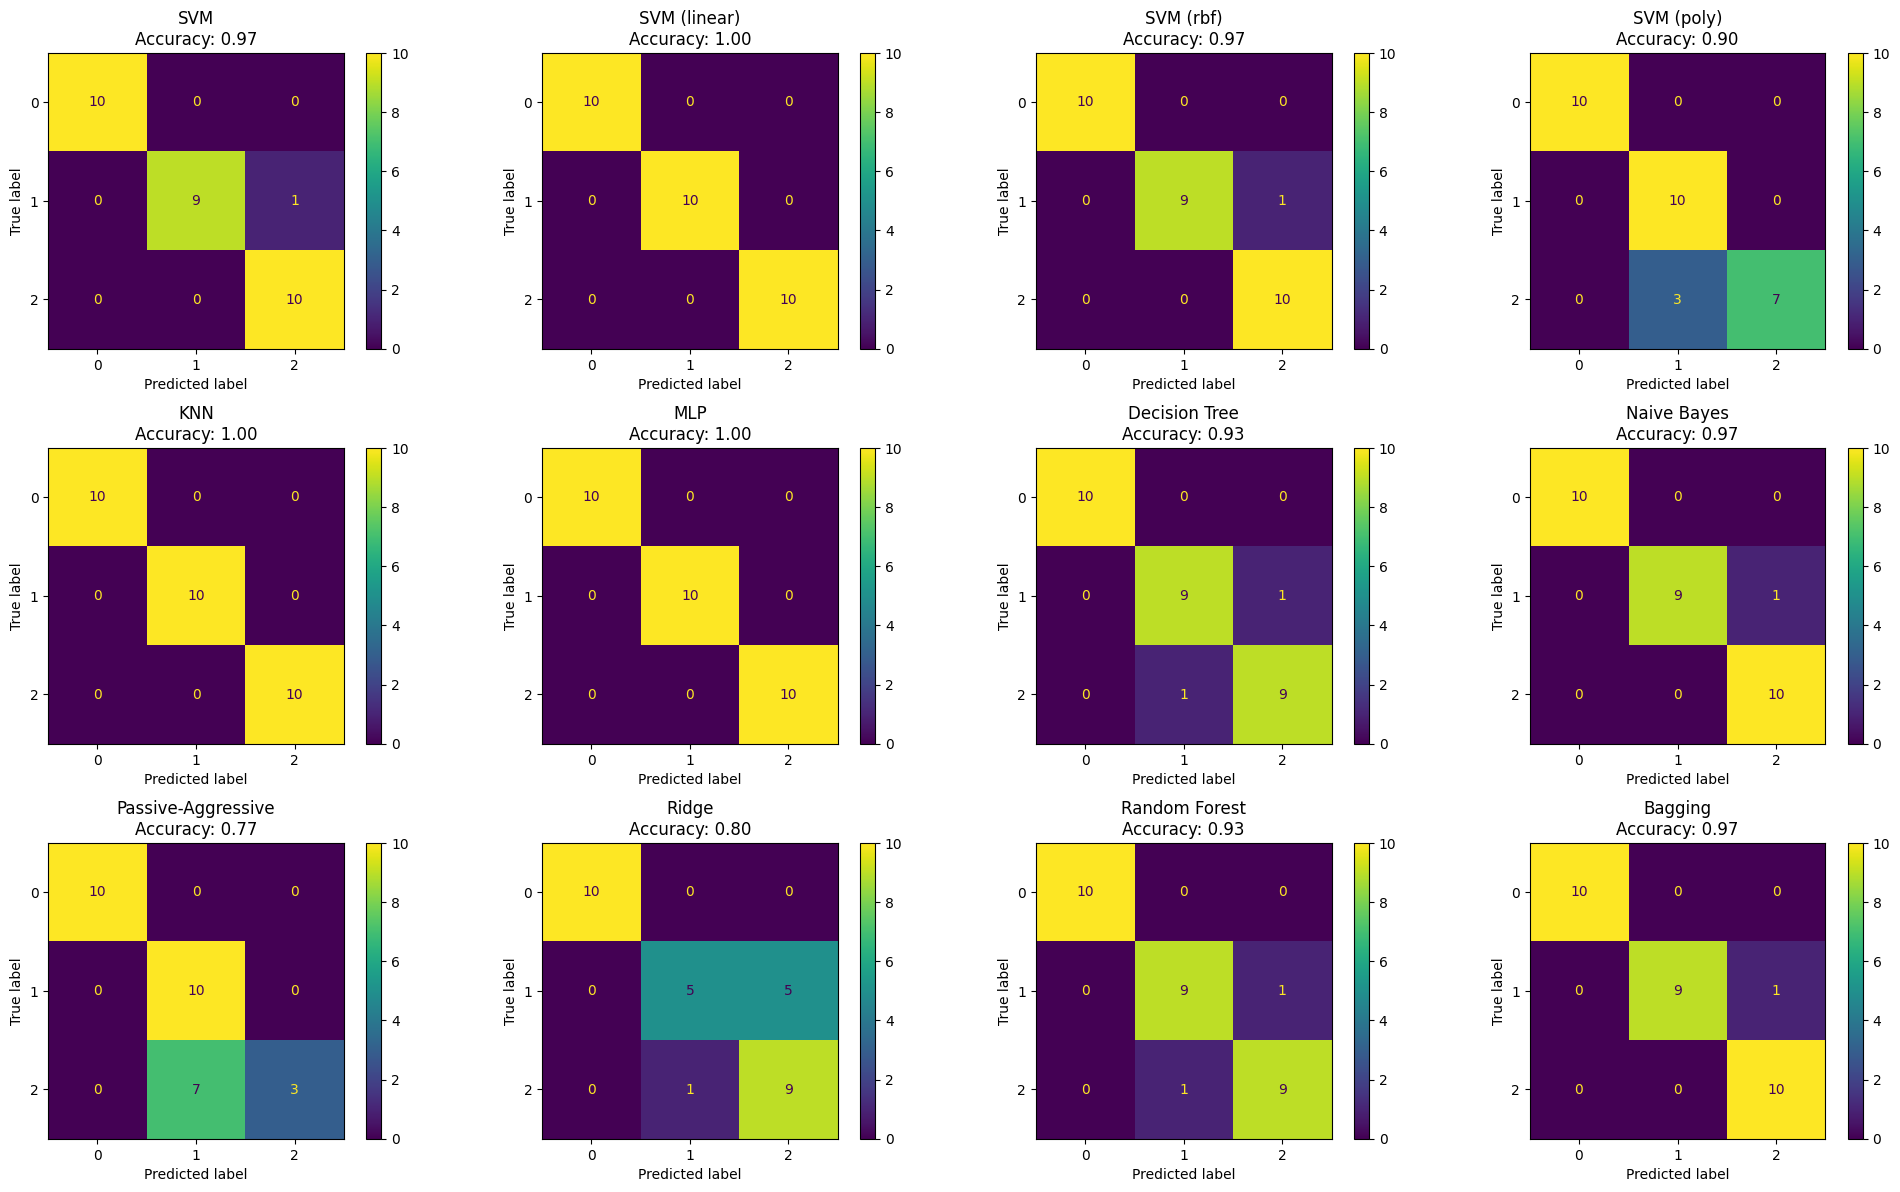

                 Model  Accuracy
0                  SVM  0.966667
1         SVM (linear)  1.000000
2            SVM (rbf)  0.966667
3           SVM (poly)  0.900000
4                  KNN  1.000000
5                  MLP  1.000000
6        Decision Tree  0.933333
7          Naive Bayes  0.966667
8   Passive-Aggressive  0.766667
9                Ridge  0.800000
10       Random Forest  0.933333
11             Bagging  0.966667


In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загружаем датасет
iris = load_iris()

# Преобразуем в DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Делим на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

fit_all_classifiers(X_train, y_train, X_test, y_test)

# Контрольные вопросы

**1. Чем отличается применение разных моделей классификации в библиотеке sklearn?**  
Модели используют разные алгоритмы, допущения и методы обучения, что влияет на точность, скорость и устойчивость к переобучению.

**2. Что показывает метрика точности регрессии?**  
Оценивает, насколько хорошо предсказанные значения приближаются к фактическим (например, R², MAE, MSE).

**3. Какое значение имеют коэффициенты логистической регрессии?**  
Они отражают вклад соответствующих признаков в логарифм отношения вероятностей классов.

**4. Что показывает матрица классификации?**  
Показывает количество правильных и ошибочных предсказаний по каждому классу.

**5. Какие параметры имеет конструктор объекта логистической регрессии?**  
`LogisticRegression(penalty, C, solver, max_iter, random_state, ...)`

**6. Какие атрибуты имеет объект логистической регрессии?**  
`coef_`, `intercept_`, `classes_`, `n_iter_`, `predict`, `predict_proba`

**7. Какие параметры и атрибуты имеют объекты других моделей машинного обучения библиотеки sklearn?**  
Параметры: специфичны для каждой модели (`n_neighbors`, `max_depth`, `kernel`, и т.д.)  
Атрибуты: общие (`fit`, `predict`, `score`, `get_params`, `set_params`) + модельные (`feature_importances_`, `support_vectors_`, и др.)
